# Titanic Survival Analysis

## Problem 

- Titanic Survival is a binary classification problem, based on numerous features provided for passengers the survival chances
for an individual can be predicted, survivors of Titanic were predominately women or men of higher social status (passenger 
class is a good proxy for socio-economic status), based on these features we can train a ML model to predict probable survivors.

### 1. Horse Before the Cart : Understanding the problem & data well / Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# loading the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Feature Analysis

#### A. Pclass Feature Analysis

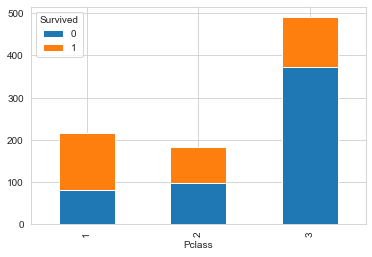

In [6]:
train_df.pivot_table(values='PassengerId',index='Pclass',columns='Survived',aggfunc='count').plot(kind='bar',stacked = True)

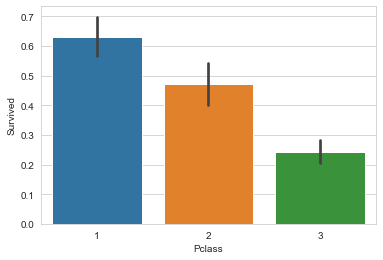

In [7]:
sns.barplot(x=train_df['Pclass'],y=train_df['Survived'])

- pclass is a good predictor for survival chances, also it has no missing values

#### B. Name Feature Analysis

- An important clue that can be extracted from the names is title which can be extracted and binned into categories which
can provide some prediction power to model

In [8]:
# making the title splitter function
def splitter(arg):
    """
    Extracts the title from name column
    """
    arg_1 = arg.split(",")
    arg_2 = arg_1.pop()
    arg_3 = arg_2.split(".")
    title = arg_3[0]
    return title

In [9]:
# splitter demo
argx= train_df["Name"][176]
extract = splitter(argx)
extract

' Master'

In [10]:
extract == " Master"

True

In [11]:
# applying the function on train and test dataset
train_df['Title'] = train_df["Name"].apply(splitter)
test_df['Title'] = test_df["Name"].apply(splitter)

In [12]:
# tracking the different titles
train_df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Ms                1
 Jonkheer          1
 Capt              1
 Mme               1
 the Countess      1
 Sir               1
 Don               1
 Lady              1
Name: Title, dtype: int64

In [13]:
# grouping titles so that it indicates social status/importance on ship
mapping = {" Mr":"Mr",
           " Miss":"Miss",
           " Mrs":"Mrs",
           " Ms":"Mrs",
           " Master":"Master",
           " Dr":"Officer",
           " Rev":"Officer",
           " Mlle":"Miss",
           " Col":"Officer",
           " Major":"Officer",
           " Ms":"Miss",
           " Capt":"Officer",
           " Sir":"Royalty",
           " Don":"Royalty",
           " Jonkheer":"Royalty",
           " the Countess":"Royalty",
           " Lady":"Royalty",
           " Mme":"Mrs",
           " Dona": "Royalty"}

In [14]:
# mapping the new titles
train_df["title"] =  train_df['Title'].map(mapping)
test_df["title"] = test_df['Title'].map(mapping)

In [15]:
test_df['title'].value_counts()

Mr         240
Miss        79
Mrs         72
Master      21
Officer      5
Royalty      1
Name: title, dtype: int64

In [16]:
# checking the relationship b/w survival and title
train_df.pivot_table(values='PassengerId',index='title',columns='Survived',aggfunc='count')

Survived,0,1
title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Officer,13,5
Royalty,2,3


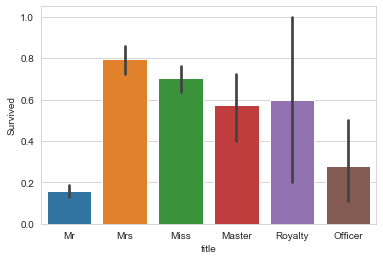

In [17]:
sns.barplot(x=train_df['title'],y=train_df['Survived'])

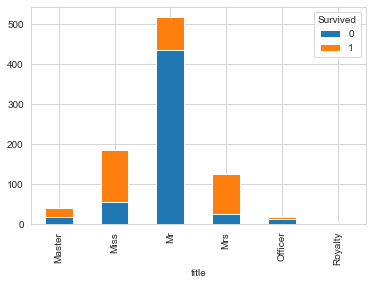

In [18]:
train_df.pivot_table(values='PassengerId',index='title',columns='Survived',aggfunc='count').plot(kind='bar',stacked = True)

- Various Title classes provide a good estimation about the survival probability and a useful feature for ML model.

#### C.Age Feature Analysis

In [19]:
train_df['Age'].isnull().sum()

177

In [20]:
test_df['Age'].isnull().sum()

86

In [21]:
# both train and test df have missing age values and requires imputation
train_df.groupby(['Pclass','Sex','title']).median()['Age']

Pclass  Sex     title  
1       female  Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        male    Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
2       female  Miss       24.0
                Mrs        32.0
        male    Master      1.0
                Mr         31.0
                Officer    46.5
3       female  Miss       18.0
                Mrs        31.0
        male    Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [22]:
# the groupby function above sumaarise the age distribution well among pclass,sex and title for imputation
train_df['Age'] = train_df.groupby(['Pclass','Sex','title'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Pclass','Sex','title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [23]:
train_df['Age'].isnull().sum()

0

#### D.Sex Feature Analysis

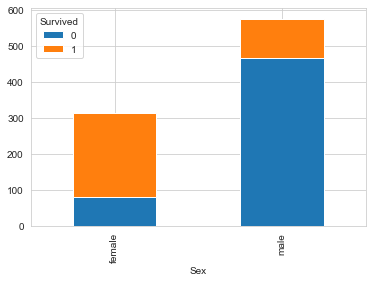

In [24]:
train_df.pivot_table(values='PassengerId',index='Sex',columns='Survived',aggfunc='count').plot(kind = 'bar',stacked = True)

In [25]:
# mapping males :0 and female:1 
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})

- Sex is definitely a powerful predictor of survival and will be useful for ML model

#### E.SibSp and ParCh Analysis

In [26]:
# SibSp and ParCh point to the same thing, # of family members of each traveller on Titanic. Family Size may affect the survival
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']

In [27]:
train_df.groupby(['Family_Size'])['Survived'].value_counts(normalize=True)

Family_Size  Survived
0            0           0.696462
             1           0.303538
1            1           0.552795
             0           0.447205
2            1           0.578431
             0           0.421569
3            1           0.724138
             0           0.275862
4            0           0.800000
             1           0.200000
5            0           0.863636
             1           0.136364
6            0           0.666667
             1           0.333333
7            0           1.000000
10           0           1.000000
Name: Survived, dtype: float64

In [28]:
# clubbing family sizes based on survival chances
def club_family(size):
    """
    Assigning family size alone,small or large based on # of family members
    """
    if size == 0:
        return 'Alone'
    elif (size == 1 or size == 2):
        return 'Small'
    else:
        return 'large'

In [29]:
# transform family size using club_family function
train_df['Family_Size'] = train_df['Family_Size'].apply(club_family)
test_df['Family_Size'] = test_df['Family_Size'].apply(club_family)

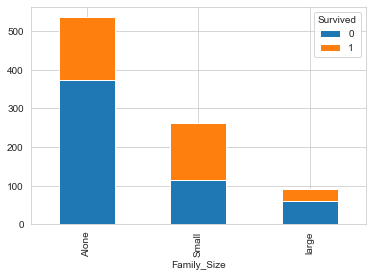

In [30]:
# Analyzing relationship with survival
train_df.pivot_table(values='PassengerId',index='Family_Size',columns='Survived',aggfunc='count').plot(kind = 'bar',stacked = True)

- Large Families had low survival rates, this goes against my initial assumption that bigger groups managed to survive better 
than solo travellers

#### E.Ticket No. Analysis

- Extracting the Intials or Numbers on ticket may provide some insight for survival, however not considering this feature as
cabin location encapsulates similar information

#### F.Fare Analysis

In [31]:
train_df['Fare'].isnull().sum()

0

In [32]:
test_df['Fare'].isnull().sum()

1

In [33]:
# imputing missing value
test_df['Fare'] = test_df.groupby(['Pclass'])['Fare'].apply(lambda x : x.fillna(x.median()))

In [34]:
test_df['Fare'].isnull().sum()

0

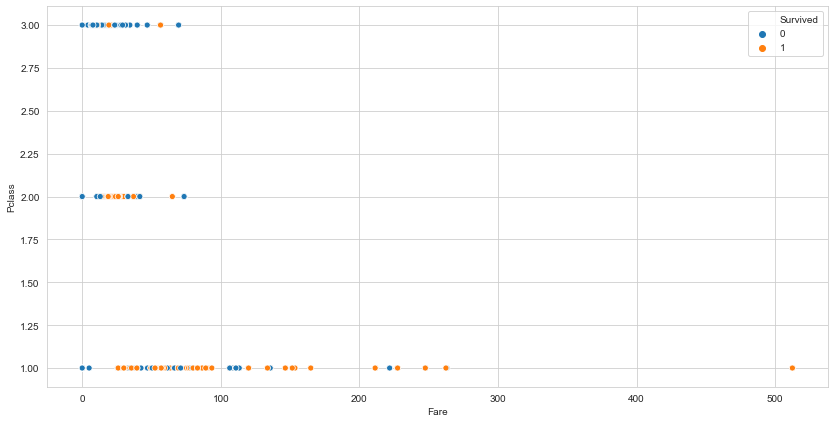

In [35]:
# analyzing relationship b/w fare and survival
plt.figure(figsize=(14,7))
sns.scatterplot(x=train_df['Fare'], y=train_df['Pclass'], hue=train_df['Survived'])

- Although higher fare is improves survival chances,the relationship is not straighforward 

#### G.Cabin Feature Analysis

In [36]:
train_df['Cabin'].isnull().sum()

687

In [37]:
test_df['Cabin'].isnull().sum()

327

- Cabin feature has lots of missing values, still cabin is important feature as the intials of Cabin # indicate the deck no.
higher the deck on ship higher the survival chances. For more info: https://www.kaggle.com/c/titanic/discussion/4693

In [38]:
# Imputing the missing values with 'Unknown'
train_df['Cabin'] = train_df['Cabin'].fillna("Unknown")
test_df['Cabin'] = test_df['Cabin'].fillna("Unknown")

In [39]:
test_df['Cabin'].isnull().sum()

0

In [40]:
# Extracting the initial letter from cabin string
train_df['Cabin'] = train_df['Cabin'].apply(lambda x : x[0])
test_df['Cabin'] = test_df['Cabin'].apply(lambda x : x[0])

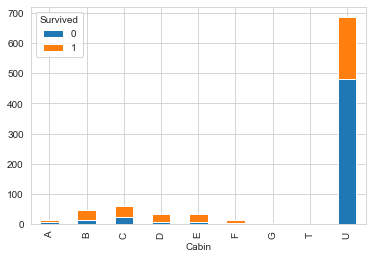

In [41]:
# Analyzing relationship with survival
train_df.pivot_table(values='PassengerId',index='Cabin',columns='Survived',aggfunc='count').plot(kind = 'bar',stacked = True)

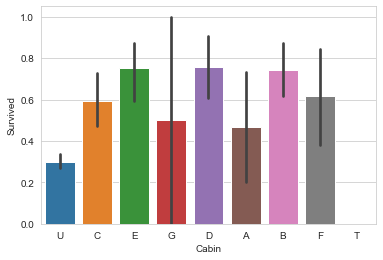

In [42]:
sns.barplot(x=train_df['Cabin'],y=train_df['Survived'])

- Cabin is definitely a good predictor of likelihood of survival.

#### H.Embarked Feature Analysis

In [43]:
train_df['Embarked'].isnull().sum()

2

In [44]:
test_df['Embarked'].isnull().sum()

0

- train_df has two missing values for embarked, imputing them by (mode of embarked)

In [45]:
train_df.groupby(['Pclass','Embarked']).count()['PassengerId']
# this gives 'S' to be the mode city of boarding

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: PassengerId, dtype: int64

In [46]:
# imputing missing values with 'S'
train_df['Embarked'].fillna('S',inplace = True)

In [47]:
train_df['Embarked'].isnull().sum()

0

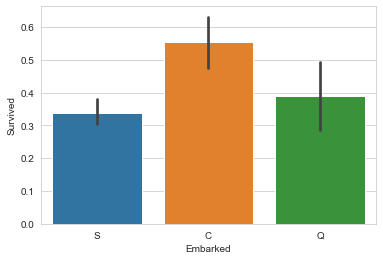

In [48]:
sns.barplot(x=train_df['Embarked'],y=train_df['Survived'])

- Again, different cities of boarding resulted in different survival rates (Did Passengers boarding from city 'C' were placed
in better cabins/class?)

### 2. Data Prep/Feature Enginnering

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  title        891 non-null    object 
 14  Family_Size  891 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  title        418 non-null    object 
 13  Family_Size  418 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 45.8+ KB


- We have no missing values in dataset and generated new features (title,Family_Size) from existing features to better
understand the survival chances.

#### A.Dropping Obsolete Features
- Name(title already extracted),SibSp & Parch (Family_Size extracted), Ticket, Title(correct labels are in title column) can 
be removed from the dataset as either we removed the relevant info or they had zero predicion power in first place

In [51]:
# dropping obsolete features
drop_features = ['Name','SibSp','Parch','Ticket','Title']
train_df.drop(drop_features,axis=1,inplace=True)
test_df.drop(drop_features,axis=1,inplace=True)

In [52]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family_Size
0,1,0,3,0,22.0,7.2500,U,S,Mr,Small
1,2,1,1,1,38.0,71.2833,C,C,Mrs,Small
2,3,1,3,1,26.0,7.9250,U,S,Miss,Alone


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Embarked     891 non-null    object 
 8   title        891 non-null    object 
 9   Family_Size  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


#### B.Bin Continious Features

- I have come across some kaggle notebooks that bin continious features with the assumption that it increases generalization in
model and gives better accuracy, however i also came acorss articles suggesting the opposite.
- Binning results in loss of information in favor of generalization, also there are no specific cut-points in both "Age" and
"Fare", therefore i refrained from binning continoius data
- Useful links : https://web.ma.utexas.edu/users/mks/statmistakes/dividingcontinuousintocategories.html

#### C.One-hot/Label Encoding Categorical Features

- Categorical Features can't be directly used with most ML Algorithms, it's always a good practice to convert categorical data
into dummy variables
- Pclass, Cabin, Embarked, title, Family_Size are categorical variables in train/test data
- Again with categorical variables we have a choice label encoding vs. one-hot encoding, label encoding makes sense when
  when categorical variables is ordinal (Pclass), Pclass is already label encoded.
- Cabin, Embarked ,title,Sex and Family_Size should be one-hot encoded before applying any ML algorithm
- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [54]:
# One-hot enoding with pandas => get_dummies function
cat_cols = ['Sex','Cabin','Embarked','title','Family_Size']

for col in cat_cols:
    dummy = pd.get_dummies(train_df[col], drop_first=False)
    dummy = dummy.add_prefix('{}_'.format(col))
    train_df.drop(col,axis=1,inplace=True)
    train_df = train_df.join(dummy)
    
for col in cat_cols:
    dummy = pd.get_dummies(test_df[col], drop_first=False)
    dummy = dummy.add_prefix('{}_'.format(col))
    test_df.drop(col,axis=1,inplace=True)
    test_df = test_df.join(dummy)

In [55]:
# rename Sex_0 : Sex_Male and Sex_1 : Sex_Female
train_df.rename(columns={'Sex_0': 'Sex_Male', 'Sex_1': 'Sex_Female'},inplace=True)
test_df.rename(columns={'Sex_0': 'Sex_Male', 'Sex_1': 'Sex_Female'},inplace=True)

In [56]:
train_df.head(5)

,PassengerId,Survived,Pclass,Age,Fare,Sex_Male,Sex_Female,Cabin_A,Cabin_B,Cabin_C,...,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Family_Size_Alone,Family_Size_Small,Family_Size_large
0,1,0,3,22.0,7.2500,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,2,1,1,38.0,71.2833,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,3,1,3,26.0,7.9250,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,4,1,1,35.0,53.1000,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


#### D.Splitting Features and Outcome

In [57]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df

In [58]:
X_train.head(5)

,PassengerId,Pclass,Age,Fare,Sex_Male,Sex_Female,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Family_Size_Alone,Family_Size_Small,Family_Size_large
0,1,3,22.0,7.2500,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,2,1,38.0,71.2833,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,3,3,26.0,7.9250,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,4,1,35.0,53.1000,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,5,3,35.0,8.0500,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


#### E.Feature Importance

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [60]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Sex_Male', 'Sex_Female',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_Officer', 'title_Royalty', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_large'],
      dtype='object')

In [61]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer',
       'title_Royalty', 'Family_Size_Alone', 'Family_Size_Small',
       'Family_Size_large'],
      dtype='object')